In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def get_songdata_from_csv(filename):
    # Assumes that the dataset was already converted from .h5 to .csv using the script in the /parsing directory
    return pd.read_csv(filename, index_col=0)

def clean_data(df):
    # Make things prettier. Remove N/A, drop rows with no hotttnessss rating
    df = df.fillna(0)
    # Drop rows w/ hottness = 0
    df = df.drop(df[df.song_hotttness==0].index)
    # Drop rows with no year? Make subset that doesn't include them?
    # df = df.drop(df[df.year == 0].index)
    # Drop things with NaN or Inf?
    # keep_indicies = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    # df = df[keep_indicies]
    # print(df)
    return df


In [3]:
# Get the data
songs_frame = get_songdata_from_csv("./data/msds.csv")
print("Number of columns: {}".format(len(songs_frame.columns)))
print("Number of rows: {}".format(len(songs_frame)))
songs_frame.head()

Number of columns: 19
Number of rows: 10000


,artist_name,danceability,duration,end_of_fade_in,energy,key,key_confidence,loudness,mode,mode_confidence,artist_hotttness,song_hotttness,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,release,year
index,,,,,,,,,,,,,,,,,,,
0,SNAP!,0.0,315.03628,0.479,0.0,9,0.568,-10.100,1,0.397,0.463900,NaN,309.156,118.175,4,0.901,The World In My Hands (We Are One),Welcome To Tomorrow,1994
1,Joy Kitikonti,0.0,413.04771,0.247,0.0,7,0.163,-7.550,1,0.411,0.367745,0.000000,398.791,130.103,4,0.000,Pleasure Zone Mix,A Century Of Beatz,0
2,Karen Peck And New River,0.0,262.84363,0.486,0.0,7,0.664,-12.266,1,0.762,0.373833,0.303978,255.466,153.909,3,1.000,Four Days Late (Studio Track w/o Background Vo...,Four Days Late (Studio Track),0
3,Leroy Huston,0.0,291.57832,0.000,0.0,0,0.428,-10.073,1,0.373,0.495307,0.215080,291.578,113.837,4,0.000,Love Oh Love (Live in Chicago),Curtis In Chicago - Recorded Live!,0
4,Bobby Broom,0.0,481.48853,0.250,0.0,0,0.624,-15.466,1,0.499,0.307863,0.334707,444.929,137.510,4,0.274,MONDAY_ MONDAY,Stand,0


In [4]:
# Clean data
df = clean_data(songs_frame)
print("Number of rows after cleaning: {}".format(len(df)))
df.head()

Number of rows after cleaning: 4214


,artist_name,danceability,duration,end_of_fade_in,energy,key,key_confidence,loudness,mode,mode_confidence,artist_hotttness,song_hotttness,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,release,year
index,,,,,,,,,,,,,,,,,,,
2,Karen Peck And New River,0.0,262.84363,0.486,0.0,7,0.664,-12.266,1,0.762,0.373833,0.303978,255.466,153.909,3,1.000,Four Days Late (Studio Track w/o Background Vo...,Four Days Late (Studio Track),0
3,Leroy Huston,0.0,291.57832,0.000,0.0,0,0.428,-10.073,1,0.373,0.495307,0.215080,291.578,113.837,4,0.000,Love Oh Love (Live in Chicago),Curtis In Chicago - Recorded Live!,0
4,Bobby Broom,0.0,481.48853,0.250,0.0,0,0.624,-15.466,1,0.499,0.307863,0.334707,444.929,137.510,4,0.274,MONDAY_ MONDAY,Stand,0
6,For Squirrels,0.0,200.07138,0.095,0.0,9,0.670,-4.737,1,0.626,0.349458,0.484563,187.826,162.909,4,0.724,Superstar,Example,1995
7,Alan Silvestri,0.0,77.60934,2.699,0.0,5,0.267,-17.944,0,0.621,0.450780,0.447784,72.150,82.556,4,0.789,We're Out Of Gas,Back To The Future III,1990


In [5]:
df.describe()

,danceability,duration,end_of_fade_in,energy,key,key_confidence,loudness,mode,mode_confidence,artist_hotttness,song_hotttness,start_of_fade_out,tempo,time_signature,time_signature_confidence,year
count,4214.0,4214.000000,4214.000000,4214.0,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000
mean,0.0,240.851781,0.763662,0.0,5.318700,0.455312,-9.564174,0.686758,0.482274,0.433881,0.459482,231.926090,124.523167,3.620313,0.522680,1286.299241
std,0.0,103.117786,1.845112,0.0,3.517984,0.275462,5.035494,0.463867,0.189136,0.119467,0.168239,101.260295,34.684414,1.215700,0.371801,957.412539
min,0.0,10.344040,0.000000,0.0,0.000000,0.000000,-41.691000,0.000000,0.000000,0.000000,0.187895,10.344000,0.000000,0.000000,0.000000,0.000000
25%,0.0,184.848530,0.000000,0.0,2.000000,0.232500,-12.005000,0.000000,0.367000,0.364914,0.313562,177.397500,97.867250,3.000000,0.137250,0.000000
50%,0.0,229.615870,0.188000,0.0,6.000000,0.482000,-8.431500,1.000000,0.491000,0.416173,0.450762,220.302500,121.641000,4.000000,0.567500,1993.000000
75%,0.0,279.888528,0.409000,0.0,8.000000,0.667000,-5.982250,1.000000,0.609000,0.497569,0.586366,269.123750,146.376750,4.000000,0.876000,2004.000000
max,0.0,1686.752200,32.972000,0.0,11.000000,1.000000,0.566000,1.000000,1.000000,1.082503,1.000000,1686.752000,258.677000,7.000000,1.000000,2010.000000


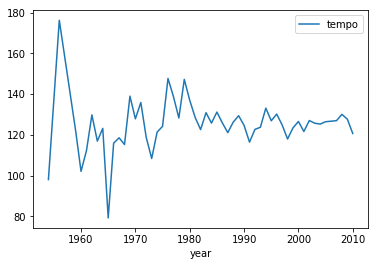

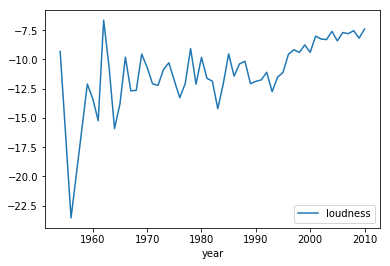

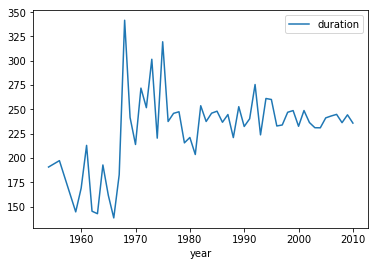

In [6]:
# Things by year
df_without_bad_year = df.drop(df[df.year == 0].index)
year_df = df_without_bad_year.groupby(df.year).mean()
year_df.plot(x='year', y='tempo')
year_df.plot(x='year', y='loudness')
year_df.plot(x='year', y='duration')

This looks pretty inconclusive, but it'll probably smooth out when the entire dataset is considered and not a lil subset.

In [7]:
# Most popular songs
df.sort_values(by=['song_hotttness','year'],ascending=False)[['title','artist_name','release','song_hotttness','year']].head(10)

,title,artist_name,release,song_hotttness,year
index,,,,,
2996,Nothin' On You [feat. Bruno Mars] (Album Version),B.o.B,B.o.B Presents: The Adventures of Bobby Ray,1.000000,2010
364,Immigrant Song (Album Version),Led Zeppelin,Led Zeppelin III,1.000000,1970
3752,This Christmas (LP Version),Donny Hathaway,A Classic Soul Christmas,0.997758,0
1452,If Today Was Your Last Day (Album Version),Nickelback,Dark Horse,0.984347,2008
8719,Harder To Breathe,Maroon 5,Songs About Jane,0.979837,2002
1025,Blue Orchid,The White Stripes,Blue Orchid,0.972387,2005
8211,Just Say Yes,Snow Patrol,Just Say Yes,0.945995,2009
2962,They Reminisce Over You (Single Version),Pete Rock & C.L. Smooth,Mecca And The Soul Brother,0.932274,1992
2762,Exogenesis: Symphony Part 1 [Overture],Muse,The Resistance,0.931346,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a6fa52d30>]],
      dtype=object)

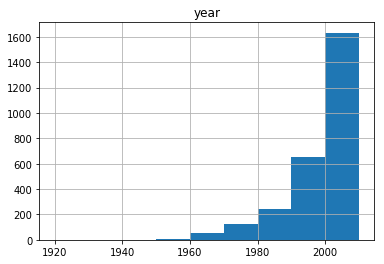

In [8]:
# Songs by year
df.hist(column='year', bins=range(1920,2020,10))

In [10]:
# Mean song hotttnesss
mean_hotttness = df.song_hotttness.mean() 
print(mean_hotttness)

0.4594819564356214
